In [130]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset in Python environment
# data is in csv format, so we use load_csv method from pandas
df= pd.read_csv("train_loan.csv")

# Data Familiarisation

In [3]:
# view the first 3 rows of the data
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
# view the last 3 rows of the data
df.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# shape of the dataset
df.shape

(614, 13)

The data got 614 rows & 13 columns

In [8]:
# print the columns names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

The target column is Loan_Status & the rest are Independent features. SO its a binary classification problem.

In [10]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Note: </br>
1. Among 13 columns, 4 are of float type , one is of int type and the rest are of object type</br>
2. There are missing values in the dataset

In [11]:
# display statistics summary of the dataset, it will consider only the numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Note: There are some outliers in the dataset.

In [12]:
# we can see the null values in the dataset
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values present in the dataset.

In [31]:
# check the dtype of the data
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [54]:
# check for duplicated rows
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


No duplicate rows in the dataset

# Missing value handling

In [23]:
# % misisng values
df.isna().sum()/len(df) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

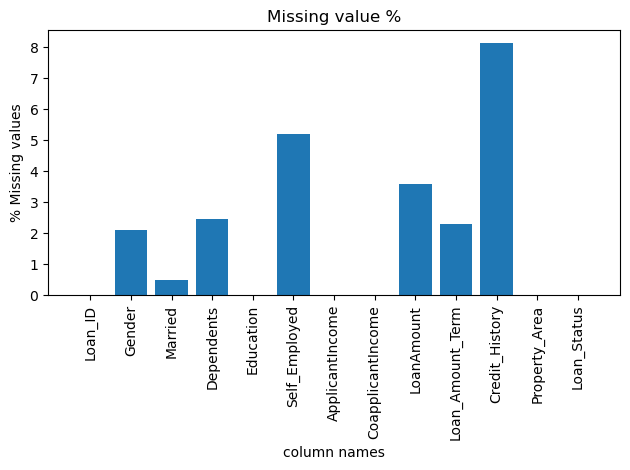

In [21]:
# Lets see the % of missing values in the data
plt.bar(height=df.isna().sum()/len(df) * 100, x=df.columns)
plt.xlabel("column names")
plt.xticks(rotation=90)
plt.ylabel("% Missing values")
plt.title("Missing value %")
plt.tight_layout()

In [26]:
# display columns containing missing values
df.isna().sum()[df.isna().sum()!=0].index

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [29]:
df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']].head(3)

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,No,NaN,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0


In [32]:
# we have 4 object type columns
# let's format the Dependents column
# check the unique values of Dependents column

df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [33]:
#  lets remove the + sign from it
df['Dependents']=df['Dependents'].str.replace('+','')

C:\Users\Raseena_rasheed\AppData\Local\Temp\ipykernel_11276\3646906991.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents']=df['Dependents'].str.replace('+','')


### Handling of missing in object type column

In [40]:
# Handling of missing in object type column
#object columns are independent of each other. so Lets fill the null values with its mode
cat_columns=['Gender', 'Married', 'Dependents', 'Self_Employed']

for i in cat_columns:
    df[i]=df[i].fillna(df[i].mode()[0])

# Handling of missing in numeric columns

In [59]:
# Handling null values in Credit_History, Loan_Amount_Term & LoanAmount
# drop the rows where these 3 or 2 values are null
null_indexes=df[df['LoanAmount'].isna()].index

In [61]:
# append the index to null_indexes
null_indexes=null_indexes.append(df[df['Credit_History'].isna()].index)

In [62]:
# append the index to null_indexes
null_indexes=null_indexes.append(df[df['Loan_Amount_Term'].isna()].index)

In [65]:
# check the duplicated index
null_indexes[null_indexes.duplicated()]

Int64Index([95], dtype='int64')

In [69]:
df[df.index==95]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N


In [70]:
# Lets drop this row. 
df.drop(index=95,inplace=True)

In [76]:
# reset the index
df.reset_index(drop=True,inplace=True)

In [85]:
# Handle the missing values in nuemric columns
# list the unique values in Loan_Amount_Term & Credit_History
# the credit history column is a discrete numeric columns, only have 0.0 and 1.0 values. so fill the Credit_History column with most frequent value. ie. 0.1

print(df['Loan_Amount_Term'].value_counts())
print(df['Credit_History'].value_counts())

360.0    511
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [86]:
# fill the null values in column Credit_History with 1.0
df['Credit_History'].fillna(1.0, inplace=True)

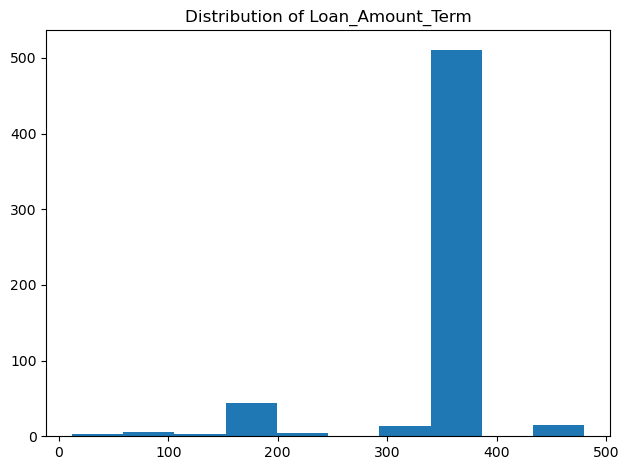

In [88]:
# lets plot histogram to see the distributon in Loan_Amount_Term
# its also a discrete numeric column, skewed distribution

plt.title('Distribution of Loan_Amount_Term')
plt.hist(df['Loan_Amount_Term'])
plt.tight_layout()

In [93]:
# its also a discrete numeric column, skewed distribution

In [90]:
# fill the null values in Loan_Amount_Term with its median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

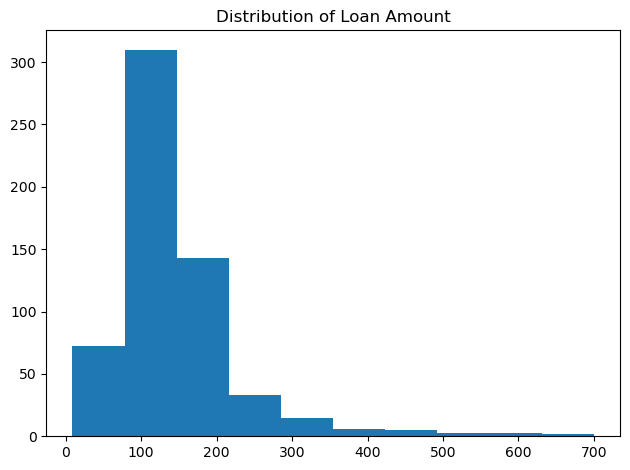

In [92]:
# lets plot histogram to see the distributon in LoanAmount
# its a continuous numeric column

plt.title('Distribution of Loan Amount')
plt.hist(df['LoanAmount'])
plt.tight_layout()

In [94]:
# data is skewed, so fill the value with its median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [96]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outlier detection

In [108]:
# display numeric columns
df.select_dtypes(exclude=object).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

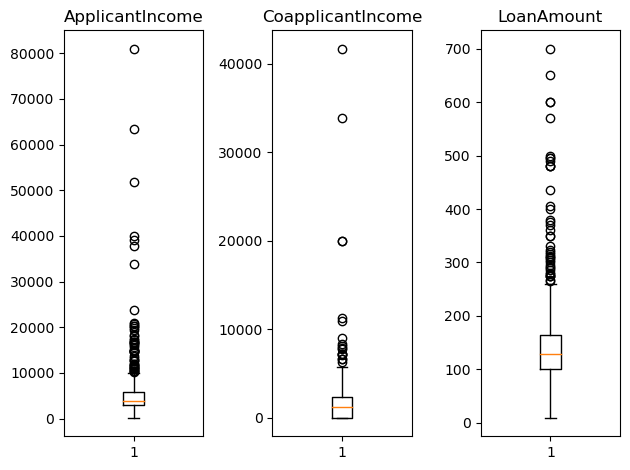

In [112]:
# we need to handle outliers in continuous numerical column
# Credit_History & Loan_Amount_Term are discrete numeric columns, no need to check for outliers

plt.subplot(1,3,1)
plt.title('ApplicantIncome')
plt.boxplot(df['ApplicantIncome'])
plt.subplot(1,3,2)
plt.title('CoapplicantIncome')
plt.boxplot(df['CoapplicantIncome'])
plt.subplot(1,3,3)
plt.title('LoanAmount')
plt.boxplot(df['LoanAmount'])
plt.tight_layout()

Note:</br>
1. There are outliers present in these columns</br>
2. there are many outliers, so droping the outlier couldn't be a good option</br>

In [114]:
# There are outliers present in these columns
# there are many outliers, so droping the outlier couldn't be a good option
# So cap these outlier in these columns using IQR technique

for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    Q1=df[i].quantile(0.25)
    Q2=df[i].quantile(0.50)
    Q3=df[i].quantile(0.75)
    
    IQR=Q3-Q1
    
    upper=Q3 + (1.5*IQR)
    lower=Q1 -(1.5*IQR)
    
    df[i] =np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))

outliers have been handled using IQR

# Encoding

In [117]:
# unique values in Property_Area
df['Property_Area'].value_counts()

Semiurban    233
Urban        201
Rural        179
Name: Property_Area, dtype: int64

In [118]:
# unique values in Education
df['Education'].value_counts()

Graduate        479
Not Graduate    134
Name: Education, dtype: int64

In [125]:
#Before doing encoding lets split the data into independent & target feature
# we can remove loan id from the data , its just a identification no. nothing to do with modeling

y=df['Loan_Status']
x=df.drop(['Loan_ID','Loan_Status'],axis=1)

In [119]:
# encoding trasform data from one format to another
# for machine learning algorithm requirs data in numerical format
# so need to convert categorical columns to numeric type

# for Target column, Loan_Status- will do Label encoding
# for the rest of the columns- will do one hot encoding

In [126]:
# Label encode target column
le=LabelEncoder()
y=le.fit_transform(y)

In [127]:
# one hot encoding using panada get dummies method. It adds binary columns for each ctaegory
# set drop_first=True to avoid multicollinearity
x = pd.get_dummies(x,dtype =int,drop_first=True)

In [129]:
x.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1


# Scaling

In [134]:
# since the data having varying magnitude- some columns contains high value. the rest are in range of 0-1
# so lets the normalise the columns having high magnitude
# Normalisation using MinMaxScaler- the value will modified without changing the underlying distribution

scaler=MinMaxScaler()
x.iloc[:,0:4]=scaler.fit_transform(x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [136]:
x.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.570699,0.000000,0.469428,0.74359,1.0,1,0,0,0,0,0,0,0,1
1,0.443921,0.262033,0.469428,0.74359,1.0,1,1,1,0,0,0,0,0,0
2,0.285400,0.000000,0.224852,0.74359,1.0,1,1,0,0,0,0,1,0,1
